# Length of Stay Predictions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The goal of this portfolio project is to improve our accuracy in predicting the length of stay of a patient in an hospital

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
#etc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#your info here
__author__ = "Alex EBE"
__email__ = "alexauguste01@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
data = pd.read_csv('../data/train_data.csv')

In [3]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

### ---- 3 Features Description ----

1 - `case_id` : Case_ID registered in Hospital  
2 - `Hospital_code` : Unique code for the Hospital  
3 - `Hospital_type_code` : Unique code for the type of Hospital  
4 - `City_Code_Hospital` : City Code of the Hospital  
5 - `Hospital_region_code`: Region Code of the Hospital  
6 - `Available Extra Rooms in Hospital` : Number of Extra rooms available in the Hospital  
7 - `Department` : Department overlooking the case  
8 - `Ward_Typ` : Code for the Ward type  
9 - `Ward_Facility_Code` : Code for the Ward Facility  
10 - `Bed Grad` : Condition of Bed in the Ward  
11 - `patientid` : Unique Patient Id  
12 - `City_Code_Patient` : City Code for the patient  
13 - `Type of Admission` : Admission Type registered by the Hospital  
14 - `Severity of Illnes` : Severity of the illness recorded at the time of admission  
15 - `Visitors with Patient` : Number of Visitors with the patient  
16 - `Age` : Age of the patient  
17 - `Admission_Deposit` : Deposit at the Admission Time  
18 - `Stay` : Stay Days by the patient


### ---- 4 Clean the data ----

##### Missing values

`Bed Grade` has missing values

In [5]:
data.loc[data['Bed Grade'].isnull()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
293,294,6,a,6,X,4,gynecology,Q,F,NaN,27075,15.0,Trauma,Extreme,2,21-30,4420.0,31-40
1071,1072,6,a,6,X,2,gynecology,Q,F,NaN,62491,8.0,Trauma,Extreme,4,61-70,5395.0,21-30
20379,20380,6,a,6,X,4,gynecology,Q,F,NaN,69932,2.0,Trauma,Extreme,3,41-50,5989.0,31-40
23791,23792,6,a,6,X,3,gynecology,R,F,NaN,29943,10.0,Emergency,Minor,3,31-40,4488.0,41-50
25162,25163,6,a,6,X,5,gynecology,R,F,NaN,92499,1.0,Emergency,Minor,2,71-80,4885.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234337,234338,6,a,6,X,2,radiotherapy,R,F,NaN,22881,7.0,Emergency,Minor,2,11-20,2416.0,0-10
234577,234578,6,a,6,X,2,gynecology,R,F,NaN,120677,2.0,Trauma,Extreme,4,41-50,4932.0,51-60
234895,234896,6,a,6,X,2,gynecology,R,F,NaN,111514,1.0,Trauma,Moderate,4,51-60,3984.0,11-20
235048,235049,6,a,6,X,2,gynecology,R,F,NaN,57706,2.0,Trauma,Moderate,3,41-50,4139.0,51-60


In [6]:
data['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

We fill the missing value of `Bed Grade` with the most frequent value: 2.0

In [7]:
data.loc[data['Bed Grade'].isnull(),'Bed Grade'] = 2.0

In [8]:
data['Stay'].describe()

count     318438
unique        11
top        21-30
freq       87491
Name: Stay, dtype: object

### ---- 5 Explore the data (EDA) ----

In [9]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [10]:
data['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [11]:
order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days']

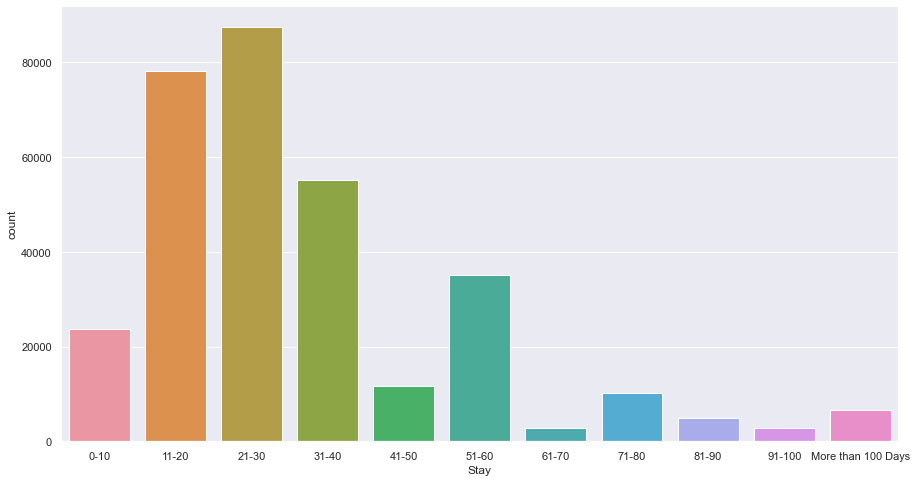

In [12]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='Stay', order=order)
plt.show()

<Figure size 1080x576 with 0 Axes>

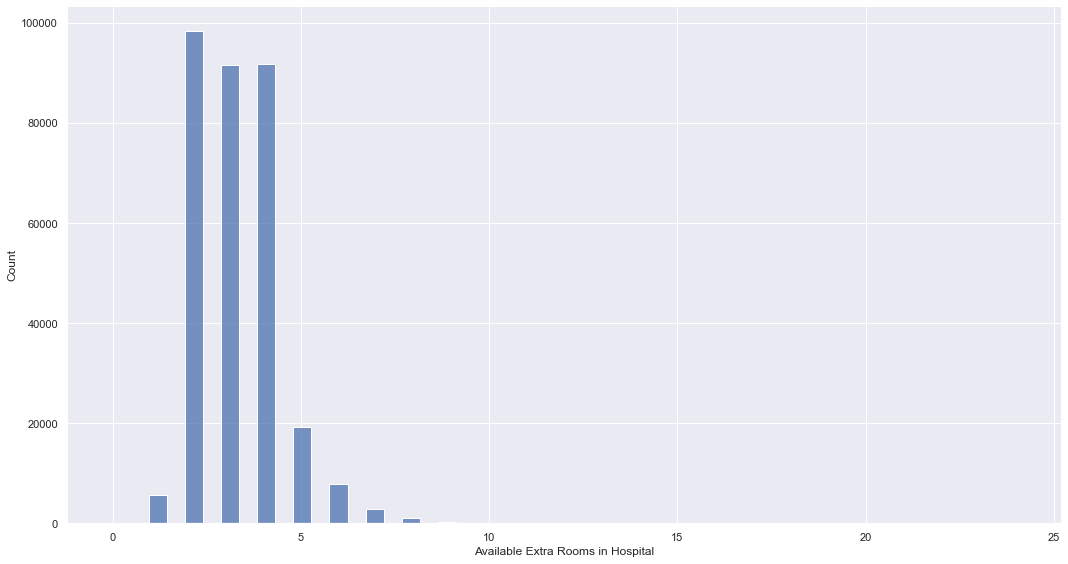

In [13]:
plt.figure(figsize=(15, 8))
sns.displot(data=data, x='Available Extra Rooms in Hospital', bins=50, height=8, aspect=15/8)
#plt.xticks(range(-200,80000,500))
plt.show()

#### Departement

In [32]:
departement_ctb = pd.crosstab(data['Stay'], data['Department'])

In [33]:
departement_ctb

Department,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery
Stay,,,,,
0-10,791,1519,18849,2379,66
11-20,2379,8823,59690,6988,259
21-30,2618,8950,68383,7263,277
31-40,1753,4958,43535,4713,200
41-50,300,851,9671,879,42
51-60,1047,2527,27989,3256,199
61-70,76,173,2226,264,5
71-80,294,703,8165,1043,49
81-90,140,384,3748,528,38


In [16]:
def plot_pie(df, feature, ctb, rows, cols, width, heigth):
    plt.figure(figsize=(width,heigth))
    #for each value taken by the feature
    for i in range(df[feature].value_counts().shape[0]):
        plt.subplot(rows, cols, i+1)
        plt.pie(ctb.iloc[:,i], labels=ctb.index, startangle=90, autopct='%1.1f%%', pctdistance=0.25, radius=1.5)
        plt.title(ctb.columns[i])    

<Figure size 1080x576 with 0 Axes>

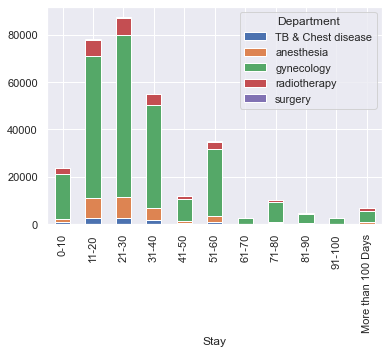

In [34]:
plt.figure(figsize=(15, 8))
departement_ctb.plot(kind='bar', stacked=True)
plt.show()

#### Severity

In [30]:
severity_ctb = pd.crosstab(data['Stay'], data['Severity of Illness'],)

<Figure size 1080x576 with 0 Axes>

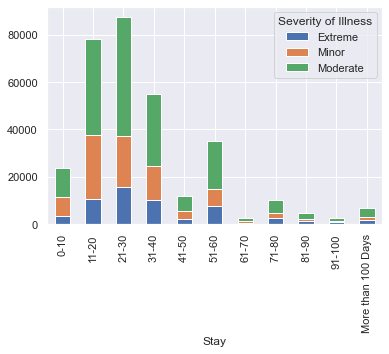

In [31]:
plt.figure(figsize=(15, 8))
severity_ctb.plot(kind='bar', stacked=True)
plt.show()

#### Type of admission

In [28]:
type_admission_ctb = pd.crosstab(data['Stay'], data['Type of Admission'],)

<Figure size 1080x576 with 0 Axes>

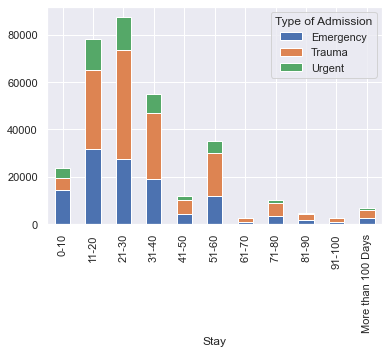

In [29]:
plt.figure(figsize=(15, 8))
type_admission_ctb.plot(kind='bar', stacked=True)
plt.show()

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data